In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [96]:
df = pd.read_excel('train-data.xlsx')

In [97]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [98]:
df.isna().sum()

Name                    3
Location                3
Year                    3
Kilometers_Driven       3
Fuel_Type               3
Transmission            3
Owner_Type              3
Mileage                 5
Engine                 39
Power                  39
Seats                  45
New_Price            5195
Price                   3
dtype: int64

In [99]:
df.drop('New_Price',axis=1,inplace=True)

In [100]:
df.dropna(inplace=True)

In [101]:
df.shape

(5972, 12)

In [102]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [103]:
df['Company'] = df['Name'].str.split().str[0]

In [104]:
df['Mileage (km/kg)'] = df['Mileage'].apply(lambda x : x.split()[0])
df['Engine (CC)'] = df['Engine'].apply(lambda x : x.split()[0])
df['Power (bhp)'] = df['Power'].apply(lambda x : x.split()[0])

In [105]:
df.dtypes

Name                  object
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Company               object
Mileage (km/kg)       object
Engine (CC)           object
Power (bhp)           object
dtype: object

In [106]:
df['Mileage (km/kg)'] = df['Mileage (km/kg)'].astype(float)
df['Engine (CC)'] = df['Engine (CC)'].astype(float)
#df['Power (bhp)'] = df['Power (bhp)'].astype(float)

In [107]:
filter = df['Power (bhp)'] == 'null'

In [108]:
data = df[~filter]

In [109]:
data.shape

(5869, 16)

In [110]:
data['Power (bhp)'] = data['Power (bhp)'].astype(float)

<ipython-input-110-f5ad6e7fa947>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Power (bhp)'] = data['Power (bhp)'].astype(float)


In [111]:
data = data.reset_index()

In [112]:
data.drop('Mileage',axis=1,inplace=True)
data.drop('Engine',axis=1,inplace=True)
data.drop('Power',axis=1,inplace=True)

In [113]:
data.head()

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage (km/kg),Engine (CC),Power (bhp)
0,0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20
2,2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70
3,3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80


In [114]:
data.drop('index',axis=1,inplace=True)

In [115]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage (km/kg),Engine (CC),Power (bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80


In [116]:
data.dtypes

Name                  object
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Seats                float64
Price                float64
Company               object
Mileage (km/kg)      float64
Engine (CC)          float64
Power (bhp)          float64
dtype: object

<AxesSubplot:xlabel='Company', ylabel='count'>

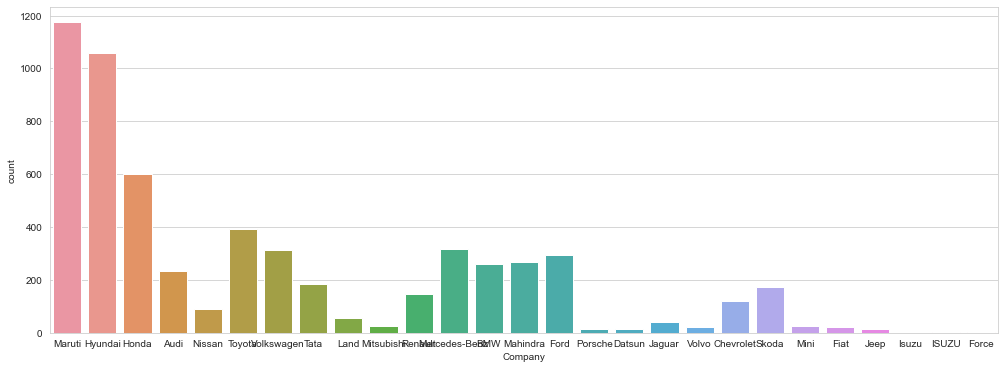

In [117]:
plt.figure(figsize = (17,6))
sns.set_style('whitegrid')
sns.countplot(x='Company',data=data)

<AxesSubplot:xlabel='Company', ylabel='Price'>

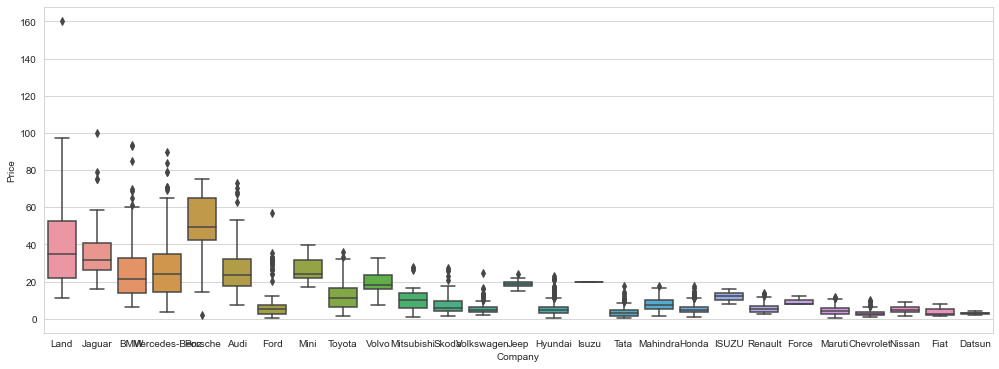

In [118]:
plt.figure(figsize = (17,6))
sns.boxplot(x='Company',y='Price',data=data.sort_values('Price',ascending = False))

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

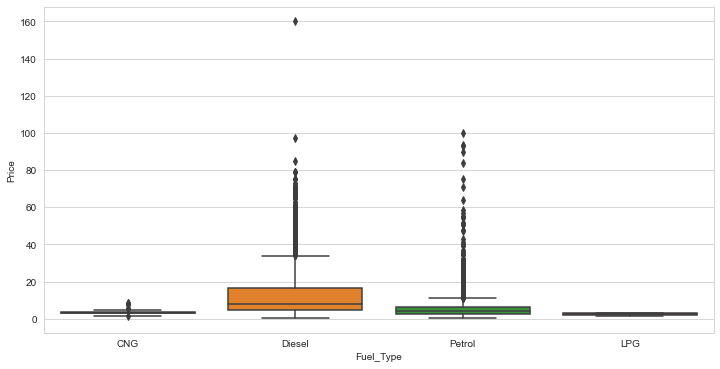

In [119]:
plt.figure(figsize = (12,6))
sns.boxplot(x='Fuel_Type',y='Price',data=data)

In [120]:
data.shape

(5869, 13)

In [121]:
data = data[data['Price'] < 140]

In [122]:
data.shape

(5868, 13)

In [123]:
data.dtypes

Name                  object
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Seats                float64
Price                float64
Company               object
Mileage (km/kg)      float64
Engine (CC)          float64
Power (bhp)          float64
dtype: object

In [124]:
data['Year'] = data['Year'].astype(int)

In [125]:
data['Location'].value_counts()

Mumbai        775
Hyderabad     716
Kochi         645
Coimbatore    629
Pune          594
Delhi         544
Kolkata       521
Chennai       475
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

In [126]:
location = pd.get_dummies(data['Location'],drop_first=True)
location.columns = ['Loc_Bangalore', 'Loc_Chennai', 'Loc_Coimbatore', 'Loc_Delhi', 'Loc_Hyderabad', 'Loc_Jaipur',
       'Loc_Kochi', 'Loc_Kolkata', 'Loc_Mumbai', 'Loc_Pune']

In [127]:
location.head()

,Loc_Bangalore,Loc_Chennai,Loc_Coimbatore,Loc_Delhi,Loc_Hyderabad,Loc_Jaipur,Loc_Kochi,Loc_Kolkata,Loc_Mumbai,Loc_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [128]:
data['Fuel_Type'].value_counts()

Diesel    3150
Petrol    2653
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

In [129]:
fuel = pd.get_dummies(data['Fuel_Type'],drop_first=True)
fuel.columns = ['Fuel_Diesel','Fuel_LPG','Fuel_Petrol']
fuel.head()

,Fuel_Diesel,Fuel_LPG,Fuel_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [130]:
transmission = pd.get_dummies(data['Transmission'],drop_first=True)
transmission.columns = ['Transmission_Manual']
transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [131]:
data['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [132]:
dict = {'First' : 1, 'Second' : 2, 'Fourth & Above' : 4, 'Third' : 3}

In [133]:
data['Owner_Type'] = data['Owner_Type'].map(dict)

In [134]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage (km/kg),Engine (CC),Power (bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80


In [135]:
train_data = pd.concat([data,location,fuel,transmission], axis=1)

In [136]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage (km/kg),...,Loc_Delhi,Loc_Hyderabad,Loc_Jaipur,Loc_Kochi,Loc_Kolkata,Loc_Mumbai,Loc_Pune,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Transmission_Manual
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,1,5.0,1.75,Maruti,26.60,...,0,0,0,0,0,1,0,0,0,0,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,...,0,0,0,0,0,0,1,1,0,0,1
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,1,5.0,4.50,Honda,18.20,...,0,0,0,0,0,0,0,0,0,1,1
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,1,7.0,6.00,Maruti,20.77,...,0,0,0,0,0,0,0,1,0,0,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,2,5.0,17.74,Audi,15.20,...,0,0,0,0,0,0,0,1,0,0,0


In [137]:
train_data.drop(['Name', 'Location','Fuel_Type','Transmission','Company'],axis=1,inplace=True)

In [138]:
pd.set_option('display.max_columns' , 22)

In [139]:
train_data.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage (km/kg),Engine (CC),Power (bhp),Loc_Bangalore,Loc_Chennai,Loc_Coimbatore,Loc_Delhi,Loc_Hyderabad,Loc_Jaipur,Loc_Kochi,Loc_Kolkata,Loc_Mumbai,Loc_Pune,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Transmission_Manual
0,2010,72000.0,1,5.0,1.75,26.60,998.0,58.16,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2015,41000.0,1,5.0,12.50,19.67,1582.0,126.20,0,0,0,0,0,0,0,0,0,1,1,0,0,1
2,2011,46000.0,1,5.0,4.50,18.20,1199.0,88.70,0,1,0,0,0,0,0,0,0,0,0,0,1,1
3,2012,87000.0,1,7.0,6.00,20.77,1248.0,88.76,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,2013,40670.0,2,5.0,17.74,15.20,1968.0,140.80,0,0,1,0,0,0,0,0,0,0,1,0,0,0


## Training the data

In [140]:
X = train_data.drop('Price',axis=1)
y = train_data['Price']

In [141]:
X.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Mileage (km/kg)',
       'Engine (CC)', 'Power (bhp)', 'Loc_Bangalore', 'Loc_Chennai',
       'Loc_Coimbatore', 'Loc_Delhi', 'Loc_Hyderabad', 'Loc_Jaipur',
       'Loc_Kochi', 'Loc_Kolkata', 'Loc_Mumbai', 'Loc_Pune', 'Fuel_Diesel',
       'Fuel_LPG', 'Fuel_Petrol', 'Transmission_Manual'],
      dtype='object')

In [142]:
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
5864     4.75
5865     4.00
5866     2.90
5867     2.65
5868     2.50
Name: Price, Length: 5868, dtype: float64

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [145]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [147]:
def predict(ml_model) :
    model = ml_model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("r2_score : {}".format(r2_score(y_test,pred)))
    print("MAE : {}".format(mean_absolute_error(y_test,pred)))
    print("MSE : {}".format(mean_squared_error(y_test,pred)))
    print("RMSE : {}".format(np.sqrt(mean_squared_error(y_test,pred))))
    
    sns.distplot(y_test-pred)
    

r2_score : 0.5798990628764995
MAE : 3.7246137855618575
MSE : 51.14655889109296
RMSE : 7.151682242038789


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


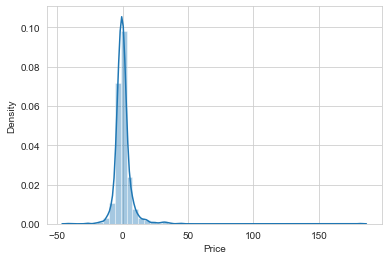

In [148]:
predict(LinearRegression())

r2_score : 0.5402129604235804
MAE : 4.1475126484254
MSE : 55.97827288384099
RMSE : 7.481862928699041


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


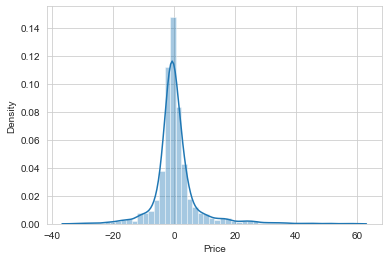

In [149]:
predict(KNeighborsRegressor())

r2_score : 0.9191625607745433
MAE : 1.4924101912628764
MSE : 9.841817717094266
RMSE : 3.137167148414994


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


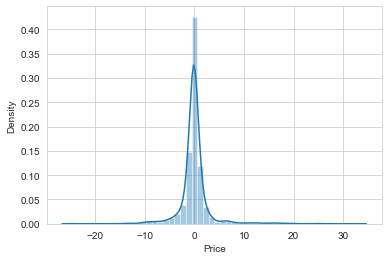

In [150]:
predict(RandomForestRegressor())

r2_score : 0.8518530035570906
MAE : 1.9628342798141456
MSE : 18.036639313371193
RMSE : 4.246956476510113


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


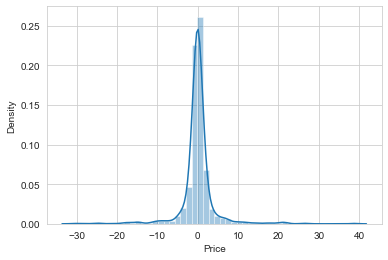

In [151]:
predict(DecisionTreeRegressor())

### Hypertuning

In [152]:
from sklearn.model_selection import RandomizedSearchCV

In [190]:
n_estimator = [int(x) for x in np.linspace(start = 100, stop = 1200, num=6)]
max_depth = [int(x) for x in np.linspace(start = 5, stop = 25, num = 5)]

In [191]:
random_grid = {
    'n_estimators' : n_estimator,
    'max_features' : ['auto','sqrt'],
    'max_depth' : max_depth,
    'min_samples_split' : [5,10,15,50]
}

In [192]:
rf_model = RandomForestRegressor()

In [193]:
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [198]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 50],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [199]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 15}

In [200]:
predictions = rf_random.predict(X_test)

In [201]:
r2_score(y_test,predictions)

0.9160669607676881

In [202]:
import pickle

In [203]:
file = open('F:\Data Science\Car price prediction/model.pkl','wb')

In [204]:
pickle.dump(rf_random,file)

In [205]:
model = open('F:\Data Science\Car price prediction/model.pkl','rb')
forest = pickle.load(model)

In [206]:
p = forest.predict(X_test)

In [207]:
r2_score(y_test,p)

0.9160669607676881